In [320]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import scipy.stats as stats
import pylab
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import time

In [321]:
df = pd.read_csv('hw5_treasury yield curve data.csv')

In [322]:
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


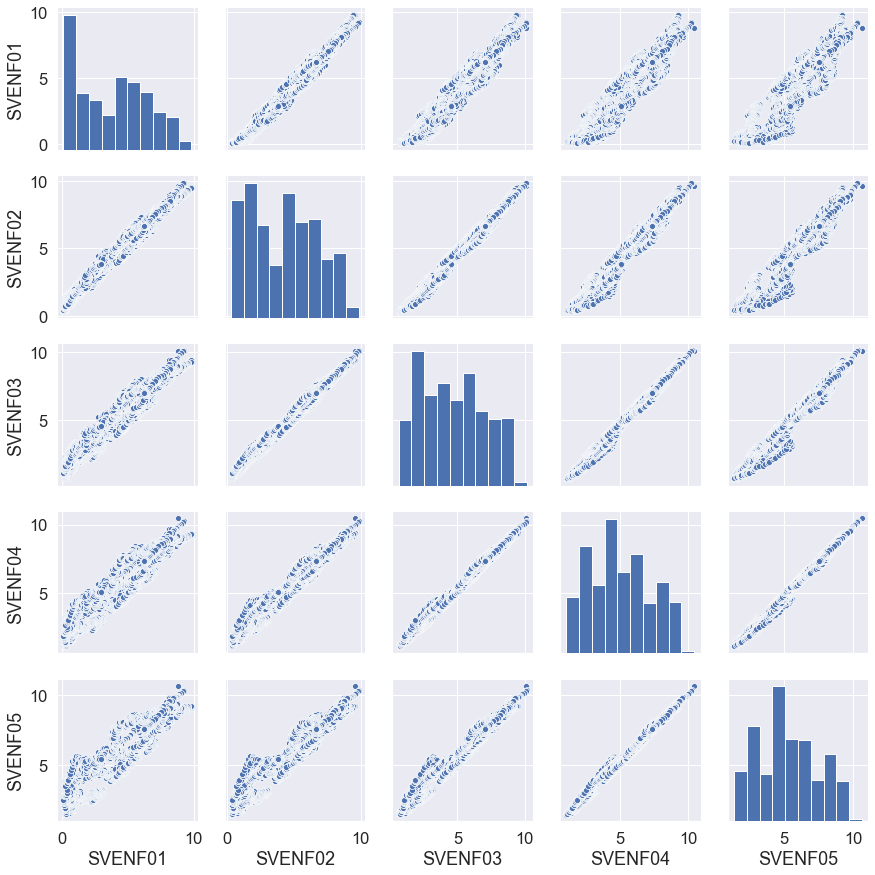

In [323]:
cols = ['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05']
sns.pairplot(df[cols],height=2.5)
plt.tight_layout()
plt.show()

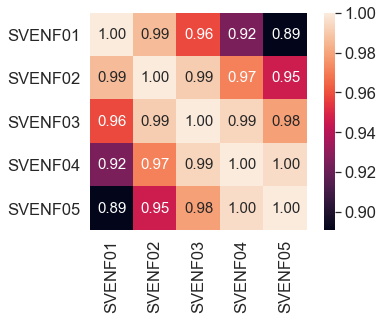

In [324]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,
                 xticklabels=cols)
plt.show()  

In [325]:
pp_data = df.loc[:,"SVENF01"]

((array([-3.75730221, -3.52914417, -3.40374181, ...,  3.40374181,
          3.52914417,  3.75730221]),
  array([0.0727, 0.0737, 0.0782, ..., 9.8067, 9.807 , 9.8138])),
 (2.5640588076332738, 3.7853113740552597, 0.9679180452145839))

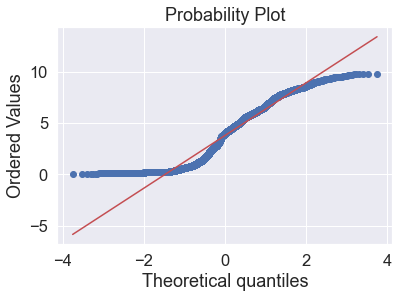

In [326]:
stats.probplot(pp_data, dist='norm',plot=pylab)

In [327]:
X = df.iloc[:, 1:-1].values
y = df[['Adj_Close']].values

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [329]:
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

In [330]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([9.31796975e-01, 4.07650756e-02, 2.18438668e-02, 4.85133058e-03,
       6.63341250e-04, 6.87379176e-05, 9.48168675e-06, 1.09876995e-06,
       8.50910960e-08, 6.74428451e-09, 4.72621857e-10, 3.80161775e-11,
       9.30609065e-12, 8.71811396e-12, 8.59362280e-12, 8.53519254e-12,
       8.41818231e-12, 8.32407041e-12, 8.16475927e-12, 8.12446450e-12,
       7.94366171e-12, 7.84486451e-12, 7.70300119e-12, 7.56475430e-12,
       7.49445649e-12, 7.39336209e-12, 7.21415235e-12, 6.93802195e-12,
       6.58019099e-12, 6.26023985e-12])

In [331]:
pca_3 = PCA(n_components=3)
X_train_pca_3 = pca.fit_transform(X_train)
X_test_pca_3  = pca.fit_transform(X_test)
pca.explained_variance_ratio_

array([9.30677684e-01, 4.18521001e-02, 2.15074276e-02, 5.19976292e-03,
       6.85656216e-04, 6.67937727e-05, 9.32917591e-06, 1.15531130e-06,
       8.34222374e-08, 6.61129266e-09, 4.72317374e-10, 3.75014165e-11,
       9.90628362e-12, 9.52243323e-12, 9.34202383e-12, 8.81111908e-12,
       8.72820843e-12, 8.56822409e-12, 8.19728748e-12, 8.16116221e-12,
       8.12492390e-12, 7.66401486e-12, 7.53466637e-12, 7.47114123e-12,
       7.17956068e-12, 6.99802008e-12, 6.66464447e-12, 6.39740865e-12,
       6.26102397e-12, 5.80099243e-12])

In [332]:
m = 0
for i in pca.explained_variance_ratio_[0:3]:
    m+=i
print('cumulative explained variance is:%f'%m)
    

cumulative explained variance is:0.994037


In [333]:
start=time.time()
clf_sgd_3 = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42)
clf_sgd_3.fit(X_train_pca_3, y_train.ravel())
y_train_pred1 = clf_sgd_3.predict(X_train_pca_3)
y_test_pred1 = clf_sgd_3.predict(X_test_pca_3)
a = sqrt(mean_squared_error(y_train, y_train_pred1))
b = sqrt(mean_squared_error(y_test, y_test_pred1))
print('MSE train: %.3f, test: %.3f' % (a,b))
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred1), 
                                      r2_score(y_test, y_test_pred1)))
scores = cross_val_score(estimator=clf_sgd_3,X=X_train_pca_3,y=y_train.ravel(),cv=10,n_jobs=1)
print('CV training accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
scores = cross_val_score(estimator=clf_sgd_3,X=X_test_pca_3,y=y_test.ravel(),cv=10,n_jobs=1)
print('CV testimh accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
end=time.time()
print('Running time: %s Seconds'%(end-start))

MSE train: 0.339, test: 0.345
R^2 train: 0.885, test: 0.885
CV training accuracy: 0.888 +/- 0.005
CV testimh accuracy: 0.886 +/- 0.014
Running time: 0.10132598876953125 Seconds


In [334]:
start=time.time()
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42)
clf_sgd.fit(X_train, y_train.ravel())
y_train_pred2 = clf_sgd.predict(X_train)
y_test_pred2 = clf_sgd.predict(X_test)
a = sqrt(mean_squared_error(y_train, y_train_pred2))
b = sqrt(mean_squared_error(y_test, y_test_pred2))
print('MSE train: %.3f, test: %.3f' % (a,b))
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred2), 
                                      r2_score(y_test, y_test_pred2)))
scores = cross_val_score(estimator=clf_sgd,X=X_train,y=y_train.ravel(),cv=10,n_jobs=1)
print('CV training accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
scores = cross_val_score(estimator=clf_sgd,X=X_test,y=y_test.ravel(),cv=10,n_jobs=1)
print('CV test accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
end=time.time()
print('Running time: %s Seconds'%(end-start))

MSE train: 0.339, test: 0.346
R^2 train: 0.885, test: 0.884
CV training accuracy: 0.888 +/- 0.005
CV test accuracy: 0.886 +/- 0.014
Running time: 0.1060028076171875 Seconds


In [335]:
start=time.time()
clf_svr_rbf_3 = svm.SVR(kernel='rbf')
clf_svr_rbf_3.fit(X_train_pca_3, y_train.ravel())
y_train_pred3 = clf_svr_rbf_3.predict(X_train_pca_3)
y_test_pred3 = clf_svr_rbf_3.predict(X_test_pca_3)
a = sqrt(mean_squared_error(y_train, y_train_pred3))
b = sqrt(mean_squared_error(y_test, y_test_pred3))
print('MSE train: %.3f, test: %.3f' % (a,b))
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred3), 
                                      r2_score(y_test, y_test_pred3)))
scores = cross_val_score(estimator=clf_svr_rbf_3,X=X_train_pca_3,y=y_train.ravel(),cv=10,n_jobs=1)
print('CV training accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
scores = cross_val_score(estimator=clf_svr_rbf_3,X=X_test_pca_3,y=y_test.ravel(),cv=10,n_jobs=1)
print('CV test accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
end=time.time()
print('Running time: %s Seconds'%(end-start))

MSE train: 0.103, test: 0.111
R^2 train: 0.989, test: 0.988
CV training accuracy: 0.989 +/- 0.001
CV test accuracy: 0.986 +/- 0.004
Running time: 7.259652853012085 Seconds


In [336]:
start=time.time()
clf_svr_rbf = svm.SVR(kernel='rbf')
clf_svr_rbf.fit(X_train, y_train.ravel())
y_train_pred4 = clf_svr_rbf.predict(X_train)
y_test_pred4 = clf_svr_rbf.predict(X_test)
a = sqrt(mean_squared_error(y_train, y_train_pred4))
b = sqrt(mean_squared_error(y_test, y_test_pred4))
print('MSE train: %.3f, test: %.3f' % (a,b))
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred4), 
                                      r2_score(y_test, y_test_pred4)))
scores = cross_val_score(estimator=clf_svr_rbf,X=X_train,y=y_train.ravel(),cv=10,n_jobs=1)
print('CV training accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
scores = cross_val_score(estimator=clf_svr_rbf,X=X_test,y=y_test.ravel(),cv=10,n_jobs=1)
print('CV test accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
end=time.time()
print('Running time: %s Seconds'%(end-start))

MSE train: 0.103, test: 0.104
R^2 train: 0.989, test: 0.990
CV training accuracy: 0.989 +/- 0.001
CV test accuracy: 0.986 +/- 0.004
Running time: 7.316982984542847 Seconds
